<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/RIA_Extract_Article_Pages_from_full_Journal_or_Book_PDFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract Articles from Full PDFs of Journals or Books, by page numbers

### Before starting
All the PDF files (full PDFs) need to be renamed as *startPage*_*endPage*.pdf (or *page*.pdf in case of just one page); eg., 123-135.pdf or 432.pdf

### How-To
* Pack all the PDFs into a *FullPDFs.zip* file, and upload it to the same folder / directory where this notebook is saved / running;
* Run this Notebook;
* Download the processed PDFs packed inside the file PDFs2RIA.zip (located where this Notebook is saved / running).

### On Google Colab:

1) Click the files icon:

 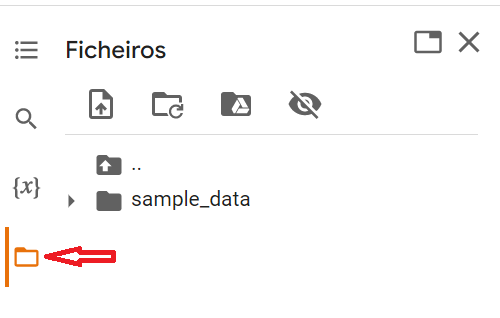

2) ... and then the upload icon:

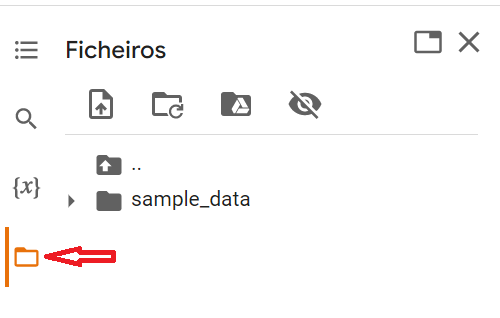

3) Upload the FullPDFs.zip file, click "OK" when getting a warning from Google regarding uploading external files; wait for the upload to finish:

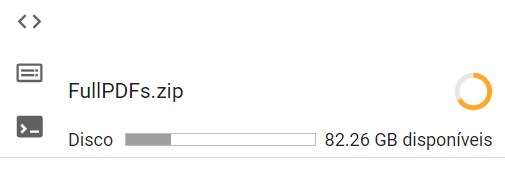

4) Run the cell bellow and wait for it to finish:

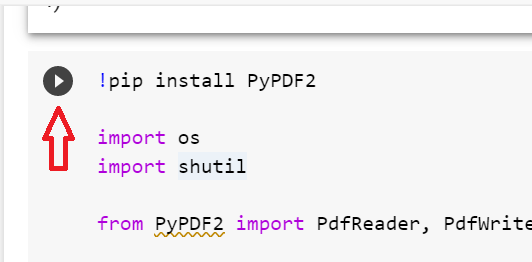

5) Refresh the interface to see the new zip file of the output:
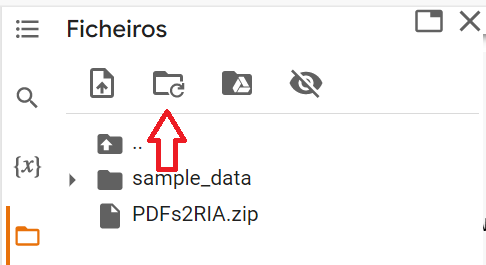

6) Download the packed files with all the processed files inside, PDFs2RIA.zip, clicking the 3 dots on the right:
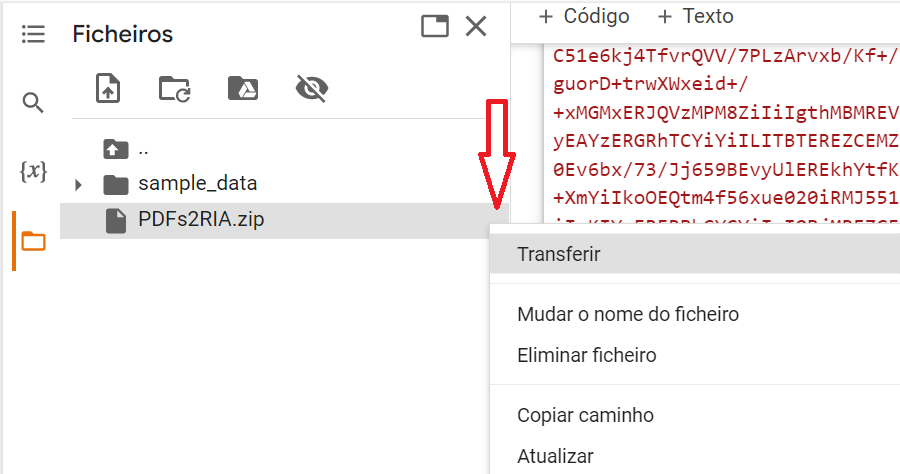

In [1]:
!pip install PyPDF2

import os
import shutil

from PyPDF2 import PdfReader, PdfWriter

def pagesLista(start, end):
    id_arr = list(range(start, end))
    return id_arr

!mkdir ./PDFs2RIA/

# Unpack the archive file
shutil.unpack_archive('./FullPDFs.zip', './PDFs2RIA/', 'zip')

# folder path
dir_path = r'./PDFs2RIA'
!mkdir ./PDFs2RIA/RIA

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)

# print(res)        
        
for pdf_file_path in res:
    file_base_name = pdf_file_path.replace('.pdf', '').replace('-', '_')
    pdf = PdfReader('./PDFs2RIA/' + pdf_file_path)
    pageSplit = file_base_name.split("_")
    
    pages = pagesLista(int(pageSplit[0])-1,int(pageSplit[len(pageSplit)-1]))
    
    pdfWriter = PdfWriter()
    for page_num in pages:
        pdfWriter.add_page(pdf.pages[page_num])

    with open('./PDFs2RIA/RIA/{0}_ria.pdf'.format(file_base_name), 'wb') as f:
        pdfWriter.write(f)
        f.close()
        
shutil.make_archive('PDFs2RIA', 'zip', './PDFs2RIA/RIA', './')

!rm ./FullPDFs.zip
!rm -rf ./PDFs2RIA/

print()
print('--------- TUDO FEITO! -----------')
print('Ficheiro de saida: PDFs2RIA.zip')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 8.5 MB/s eta 0:00:00

--------- TUDO FEITO! -----------
Ficheiro de saida: PDFs2RIA.zip
